# 导入必要的库包

In [1]:
import pandas as pd
import numpy as np
import os
import json

In [2]:
# config
TRAIN_DIR = './wenshu_ms_dataset/train/'
TEST_DIR = './wenshu_ms_dataset/test/'
DEV_DIR = './wenshu_ms_dataset/dev/'
RESULT_DIR = './result/'

TRAIN_FILES = sorted(os.listdir(TRAIN_DIR), key=lambda x:int(x[:-5]))
TEST_FILES = sorted(os.listdir(TEST_DIR), key=lambda x:int(x[:-5]))
DEV_FILES = sorted(os.listdir(DEV_DIR), key=lambda x:int(x[:-5]))



# 数据查看

In [74]:
for k, file in enumerate(TRAIN_FILES):
    with open(TRAIN_DIR + file, 'r', encoding='utf-8') as f:
        js_dt = json.load(f)
        js_dt_keys = js_dt.keys()
        js_dt_values = js_dt.values()
#         print(js_dt)
        print("----")
        print(js_dt_keys)
        print(js_dt['ctxs']['0'].keys())
        print(js_dt['gt_idx'])
        if k >= 0:
            break

----
dict_keys(['q_id', 'query', 'gt_idx', 'ctxs'])
dict_keys(['Case', 'CaseId', 'CaseProc', 'CaseRecord', 'CaseType', 'JudgeAccusation', 'JudgeReason', 'JudgeResult', 'Keywords', 'Parties', 'Category'])
[4, 28, 32, 37, 51, 57, 63, 98]


In [70]:
len(DEV_FILES)

4500

# 数据整理

In [3]:
data = []
# train_data
for k, file in enumerate(TRAIN_FILES):
    with open(TRAIN_DIR + file, 'r', encoding='utf-8') as f:
        js_dt = json.load(f)
        for _, case in js_dt['ctxs'].items():
            judge_acc = case['JudgeAccusation'].replace('\n', '').replace('×', '')
            cat1 = case['Category']['cat_1']
            cat2 = case['Category']['cat_2']
            data.append([judge_acc, cat1, cat2])

# test_data
for k, file in enumerate(TEST_FILES):
    with open(TEST_DIR + file, 'r', encoding='utf-8') as f:
        js_dt = json.load(f)
        for _, case in js_dt['ctxs'].items():
            judge_acc = case['JudgeAccusation'].replace('\n', '').replace('×', '')
            cat1 = case['Category']['cat_1']
            cat2 = case['Category']['cat_2']
            data.append([judge_acc, cat1, cat2])
data

[['原告苗某的诉讼请求：1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费。3.分割夫妻共同财产16万元。4.诉讼费由被告承担。事实与理由：2009年11月份原被告经人介绍相识订婚，2010年8月6日举行婚礼。于年月日补办理了结婚登记手续。于年月日生育长子闫某某，于年月日生育次子闫某某，现随被告生活。婚前，原被告了解不够，草率结婚。婚后，双方性格不合，为着家务事生气，争吵，婆媳关系紧张。被告挣的钱从不给妻子花用，存在婆婆手里。现已与被告分居生活，相互不往来，婚姻关系名存实亡，婚姻感情已彻底破裂，原告为维护自身的合法权益，请求人民法院依法解除原被告之间的婚姻关系。被告闫某未作答辩。经审理查明，2009年11月份，原被告经人介绍相识订婚，2010年8月6日举行婚礼。年月日补办理了结婚登记手续。年月日生育长子闫某某，年月日生育次子闫某某，两个孩子现跟随被告生活。现原告苗某以夫妻感情破裂为由提起离婚诉讼。以上事实有结婚登记审查表、户口页等证据以及当事人在庭审中的陈述予以证实',
  '婚姻家庭',
  '结婚离婚'],
 ['原告向本院提出诉讼请求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至全部本息偿还完为止，按同期银行同业拆借利率计算）；2.判令本案诉讼费用由被告承担。事实与理由：2018年4月9日，原、被告签订《协议书》，约定原告承包被告土建工程，由原告提供材料，被告支付材料款及工程款，建筑面积按照实际面积计算，每平方米一百二十元。现原告依约履行施工，并将工程交于被告使用。现被告尚欠4万元工程款尚未支付。故原告依法诉至法院。被告未答辩。本院经审理认定事实如下：2018年4月9日，原、被告签订《协议书》，约定原告为被告在延吉市朝阳川镇仲坪村一队搭建温室大棚；由原告提供材料，被告支付材料款及工程款，建筑面积按照实际面积计算，每平方米一百二十元；承包范围包括地梁0.40.3，墙旧砖24墙，高2.7米，内外抹灰；外墙保温板5公分，地梁钢筋6根，铁架1米一个，复合板厚10公分，铁皮0.3，不带塑料布；被告开工支付5万元，地梁完毕时支付材料款10万元，砌砖时支付10万元，上复合板铁架时支付5万元，剩余部分工程结束后一次性付清。后原告依约履行施工，并于2018年7月完工，但只盖了一个长101.6

In [4]:
df_ori = pd.DataFrame(data, columns = ['JudgeAccusation', 'cat_1', 'cat_2'])
df_ori['category'] = df_ori.apply(lambda x:x['cat_1']+'-'+x['cat_2'], axis=1)
df_ori['JudgeAccusation'] = df_ori['JudgeAccusation'].apply(lambda x:x[10:]) # 前十个字是无用信息
df_ori = df_ori.drop_duplicates(subset=['JudgeAccusation'], keep='first').reset_index(drop=True)
df_ori

,JudgeAccusation,cat_1,cat_2,category
0,1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费...,婚姻家庭,结婚离婚,婚姻家庭-结婚离婚
1,求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至...,建筑工程,建设工程施工,建筑工程-建设工程施工
2,公司向本院提出诉讼请求：1.判令张玲娣偿还借款人民币111000元及利息（以111000元为...,合同事务,借款合同,合同事务-借款合同
3,限公司起诉至本院请求判令：一、被告向原告支付所欠货款127290元；二、被告向原告支付违约金...,合同事务,承揽合同,合同事务-承揽合同
4,杨运钿2017年12月27日订立《股权代持协议》，主要约定原告自愿委托该被告作为自身持有的福...,公司事务,公司治理,公司事务-公司治理
...,...,...,...,...
431113,讼请求：1、判决非婚生两子女随原告生活，抚养费自理；2、诉讼费由被告负担。事实与理由，原告张...,婚姻家庭,财产分割,婚姻家庭-财产分割
431114,诉讼请求：1.请求判令两被告支付所欠运费3000元；2.请求判令两被告赔偿原告误工费2000...,合同事务,运输合同,合同事务-运输合同
431115,请求：1.请求判令解除原、被告之间的劳动合同。2.请求判令被告向原告支付解除劳动合同经济补偿...,劳动人事,劳动合同,劳动人事-劳动合同
431116,感情不和，要求离婚；收回原告的耕种土地。被告石某某辩称：与原告感情很好，不同意离婚。经审理查...,婚姻家庭,结婚离婚,婚姻家庭-结婚离婚


# 词长&统计

In [125]:
sentences = df_ori['JudgeAccusation']
sent_len = [len(sent) for sent in sentences]
sent_len

[448,
 644,
 349,
 631,
 201,
 577,
 475,
 592,
 518,
 677,
 522,
 522,
 475,
 650,
 473,
 651,
 624,
 166,
 566,
 329,
 411,
 403,
 234,
 431,
 570,
 677,
 411,
 655,
 195,
 531,
 442,
 206,
 190,
 664,
 425,
 582,
 674,
 518,
 593,
 510,
 203,
 571,
 353,
 530,
 664,
 279,
 580,
 489,
 434,
 633,
 451,
 328,
 392,
 418,
 270,
 485,
 515,
 336,
 594,
 523,
 553,
 443,
 312,
 334,
 409,
 439,
 427,
 329,
 669,
 230,
 615,
 671,
 530,
 561,
 594,
 374,
 650,
 389,
 382,
 505,
 471,
 627,
 636,
 584,
 413,
 498,
 533,
 413,
 550,
 411,
 687,
 527,
 263,
 99,
 495,
 474,
 402,
 604,
 282,
 579,
 656,
 624,
 461,
 354,
 622,
 396,
 352,
 588,
 332,
 638,
 327,
 464,
 549,
 512,
 608,
 617,
 480,
 315,
 361,
 417,
 378,
 599,
 326,
 479,
 380,
 619,
 522,
 437,
 473,
 664,
 483,
 613,
 418,
 638,
 608,
 333,
 518,
 431,
 643,
 647,
 474,
 621,
 656,
 650,
 503,
 476,
 628,
 376,
 562,
 242,
 224,
 430,
 653,
 544,
 307,
 329,
 679,
 399,
 413,
 551,
 312,
 560,
 528,
 567,
 449,
 410,
 684,

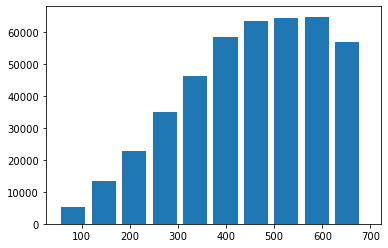

690


In [126]:
import matplotlib.pyplot as plt
plt.hist(sent_len, width=50)
plt.show()
print(max(sent_len))

In [127]:
sentences[1][:600]

'求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至全部本息偿还完为止，按同期银行同业拆借利率计算）；2.判令本案诉讼费用由被告承担。事实与理由：2018年4月9日，原、被告签订《协议书》，约定原告承包被告土建工程，由原告提供材料，被告支付材料款及工程款，建筑面积按照实际面积计算，每平方米一百二十元。现原告依约履行施工，并将工程交于被告使用。现被告尚欠4万元工程款尚未支付。故原告依法诉至法院。被告未答辩。本院经审理认定事实如下：2018年4月9日，原、被告签订《协议书》，约定原告为被告在延吉市朝阳川镇仲坪村一队搭建温室大棚；由原告提供材料，被告支付材料款及工程款，建筑面积按照实际面积计算，每平方米一百二十元；承包范围包括地梁0.40.3，墙旧砖24墙，高2.7米，内外抹灰；外墙保温板5公分，地梁钢筋6根，铁架1米一个，复合板厚10公分，铁皮0.3，不带塑料布；被告开工支付5万元，地梁完毕时支付材料款10万元，砌砖时支付10万元，上复合板铁架时支付5万元，剩余部分工程结束后一次性付清。后原告依约履行施工，并于2018年7月完工，但只盖了一个长101.6米、宽15.1米、总面积1534.1平方米的大棚。原告还为同村其他村民盖了大棚，价格均是每平方米一百二十元。被告于2018年5月中旬、6月中旬、2018年后期分三次向原告支付了14.5万元。认定上'

In [115]:
df_ori['cat_1'].value_counts()

合同事务      214208
婚姻家庭       49003
民事纠纷       44355
房地产纠纷      41112
劳动人事       23840
建筑工程       22478
金融证券保险     17946
公司事务       12637
交通事故        3795
知识产权        2975
Name: cat_1, dtype: int64

In [116]:
df_ori['cat_2'].value_counts()

合同纠纷      59423
借款合同      35681
租赁合同      31390
物权纠纷      26719
承揽合同      26641
建设工程施工    22478
保险纠纷      17946
买卖合同      17710
房屋买卖      17205
财产分割      17152
运输合同      13914
土地纠纷      12565
委托合同      11231
工资福利      11048
孩子抚养      10184
结婚离婚       8851
老人赡养       7905
抵押担保       7653
物业纠纷       7536
劳动合同       7238
服务合同       7219
人格隐私       6237
劳动争议       5554
合伙企业       4954
遗产继承       4911
企业经营       4879
侵权纠纷       4842
产品责任       4671
房产纠纷       3806
交通责任       3795
融资租赁       3346
版权软著       2975
公司治理       2804
人身侵权       1886
Name: cat_2, dtype: int64

In [5]:
df_ori['category'].value_counts()

合同事务-合同纠纷      59359
合同事务-借款合同      35676
合同事务-租赁合同      31316
合同事务-承揽合同      26640
民事纠纷-物权纠纷      26511
建筑工程-建设工程施工    22453
金融证券保险-保险纠纷    17924
合同事务-买卖合同      17700
房地产纠纷-房屋买卖     17167
婚姻家庭-财产分割      17151
合同事务-运输合同      13912
房地产纠纷-土地纠纷     12291
合同事务-委托合同      11197
劳动人事-工资福利      11021
婚姻家庭-孩子抚养      10184
婚姻家庭-结婚离婚       8850
婚姻家庭-老人赡养       7904
合同事务-抵押担保       7643
房地产纠纷-物业纠纷      7517
合同事务-服务合同       7212
劳动人事-劳动合同       7057
民事纠纷-人格隐私       6236
劳动人事-劳动争议       5493
公司事务-合伙企业       4954
婚姻家庭-遗产继承       4909
公司事务-企业经营       4878
民事纠纷-侵权纠纷       4805
民事纠纷-产品责任       4621
交通事故-交通责任       3795
房地产纠纷-房产纠纷      3786
合同事务-融资租赁       3337
知识产权-版权软著       2975
公司事务-公司治理       2759
民事纠纷-人身侵权       1885
Name: category, dtype: int64

# 构建标签字典

In [141]:
cat1_dict = {v:k for k, v in dict(enumerate(np.unique(df_ori['cat_1']))).items()}
cat1_list = list(cat1_dict.keys())
cat1_dict

{'交通事故': 0,
 '公司事务': 1,
 '劳动人事': 2,
 '合同事务': 3,
 '婚姻家庭': 4,
 '建筑工程': 5,
 '房地产纠纷': 6,
 '民事纠纷': 7,
 '知识产权': 8,
 '金融证券保险': 9}

In [142]:
cat2_dict = {v:k for k, v in dict(enumerate(np.unique(df_ori['cat_2']))).items()}
cat2_list = list(cat2_dict.keys())
cat2_dict

{'买卖合同': 0,
 '交通责任': 1,
 '产品责任': 2,
 '人格隐私': 3,
 '人身侵权': 4,
 '企业经营': 5,
 '侵权纠纷': 6,
 '保险纠纷': 7,
 '借款合同': 8,
 '公司治理': 9,
 '劳动争议': 10,
 '劳动合同': 11,
 '合伙企业': 12,
 '合同纠纷': 13,
 '土地纠纷': 14,
 '委托合同': 15,
 '孩子抚养': 16,
 '工资福利': 17,
 '建设工程施工': 18,
 '房产纠纷': 19,
 '房屋买卖': 20,
 '承揽合同': 21,
 '抵押担保': 22,
 '服务合同': 23,
 '版权软著': 24,
 '物业纠纷': 25,
 '物权纠纷': 26,
 '租赁合同': 27,
 '结婚离婚': 28,
 '老人赡养': 29,
 '融资租赁': 30,
 '财产分割': 31,
 '运输合同': 32,
 '遗产继承': 33}

In [6]:
cat_dict = {v:k for k, v in dict(enumerate(np.unique(df_ori['category']))).items()}
cat_list = list(cat_dict.keys())
cat_dict

{'交通事故-交通责任': 0,
 '公司事务-企业经营': 1,
 '公司事务-公司治理': 2,
 '公司事务-合伙企业': 3,
 '劳动人事-劳动争议': 4,
 '劳动人事-劳动合同': 5,
 '劳动人事-工资福利': 6,
 '合同事务-买卖合同': 7,
 '合同事务-借款合同': 8,
 '合同事务-合同纠纷': 9,
 '合同事务-委托合同': 10,
 '合同事务-承揽合同': 11,
 '合同事务-抵押担保': 12,
 '合同事务-服务合同': 13,
 '合同事务-租赁合同': 14,
 '合同事务-融资租赁': 15,
 '合同事务-运输合同': 16,
 '婚姻家庭-孩子抚养': 17,
 '婚姻家庭-结婚离婚': 18,
 '婚姻家庭-老人赡养': 19,
 '婚姻家庭-财产分割': 20,
 '婚姻家庭-遗产继承': 21,
 '建筑工程-建设工程施工': 22,
 '房地产纠纷-土地纠纷': 23,
 '房地产纠纷-房产纠纷': 24,
 '房地产纠纷-房屋买卖': 25,
 '房地产纠纷-物业纠纷': 26,
 '民事纠纷-产品责任': 27,
 '民事纠纷-人格隐私': 28,
 '民事纠纷-人身侵权': 29,
 '民事纠纷-侵权纠纷': 30,
 '民事纠纷-物权纠纷': 31,
 '知识产权-版权软著': 32,
 '金融证券保险-保险纠纷': 33}

# 数据导出

In [146]:
df_ori.iloc[:, :2]

,JudgeAccusation,cat_1
0,1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费...,婚姻家庭
1,求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至...,建筑工程
2,公司向本院提出诉讼请求：1.判令张玲娣偿还借款人民币111000元及利息（以111000元为...,合同事务
3,限公司起诉至本院请求判令：一、被告向原告支付所欠货款127290元；二、被告向原告支付违约金...,合同事务
4,杨运钿2017年12月27日订立《股权代持协议》，主要约定原告自愿委托该被告作为自身持有的福...,公司事务
...,...,...
431113,讼请求：1.解除原被告于2011年3月31日签订的《房屋转让合同》；2.被告向原告退还7万元...,房地产纠纷
431114,诉讼请求：1.判令被告立即给付原告工资款12020元；2.本案诉讼费用全部由被告承担。事实与...,劳动人事
431115,市公共巴士有限公司向本院提出诉讼请求：1、请求判决被告支付原告为第三人垫付的交通事故住院医疗...,交通事故
431116,求：1.判令被告给付2013年3月1日至2015年2月28日期间的物业费1464.48元及违...,房地产纠纷


In [123]:
df_ori.iloc[:, :2].to_csv(RESULT_DIR+'data_ori.txt', index=None)

In [131]:
pd.Series(cat1_dict.values())

0      交通事故
1      公司事务
2      劳动人事
3      合同事务
4      婚姻家庭
5      建筑工程
6     房地产纠纷
7      民事纠纷
8      知识产权
9    金融证券保险
dtype: object

In [133]:
pd.Series(cat1_dict.values()).to_csv(RESULT_DIR+'class.txt', index=None, header=None)

In [151]:
df_total = pd.DataFrame(zip(df_ori.iloc[:, 0], df_ori.iloc[:, 1].apply(lambda x:cat1_dict[x])))
df_total

,0,1
0,1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费...,4
1,求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至...,5
2,公司向本院提出诉讼请求：1.判令张玲娣偿还借款人民币111000元及利息（以111000元为...,3
3,限公司起诉至本院请求判令：一、被告向原告支付所欠货款127290元；二、被告向原告支付违约金...,3
4,杨运钿2017年12月27日订立《股权代持协议》，主要约定原告自愿委托该被告作为自身持有的福...,1
...,...,...
431113,讼请求：1.解除原被告于2011年3月31日签订的《房屋转让合同》；2.被告向原告退还7万元...,6
431114,诉讼请求：1.判令被告立即给付原告工资款12020元；2.本案诉讼费用全部由被告承担。事实与...,2
431115,市公共巴士有限公司向本院提出诉讼请求：1、请求判决被告支付原告为第三人垫付的交通事故住院医疗...,0
431116,求：1.判令被告给付2013年3月1日至2015年2月28日期间的物业费1464.48元及违...,6


In [149]:
df_total.to_csv(RESULT_DIR+'total.txt', index=None, header=None)

In [152]:
# train:test:dev = 6:2:2
len_ = df_total.shape[0]
df_train = df_total.iloc[:int(len_*0.6)]
df_test = df_total.iloc[int(len_*0.6):int(len_*0.8)]
df_dev = df_total.iloc[int(len_*0.8):]

In [153]:
df_train

,0,1
0,1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费...,4
1,求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至...,5
2,公司向本院提出诉讼请求：1.判令张玲娣偿还借款人民币111000元及利息（以111000元为...,3
3,限公司起诉至本院请求判令：一、被告向原告支付所欠货款127290元；二、被告向原告支付违约金...,3
4,杨运钿2017年12月27日订立《股权代持协议》，主要约定原告自愿委托该被告作为自身持有的福...,1
...,...,...
258665,求：1.要求分割被告保管的被继承人陆宪芳的遗产16152.51元、抚恤金25234.50元和...,4
258666,建筑器材租赁站诉讼请求：1.判令被告给付原告租赁费等共计70941.16元及后续占用期间的租...,3
258667,"公司向本院提出诉讼请求：1、判令被告继续履行合同,并清偿原告已完成安装交付3部电梯的价款11...",3
258668,被告于2017年11月8日签订《铺位租赁合同》，铺面位于广西南宁市内，铺位编号为3-Ａ105...,3


In [154]:
df_test

,0,1
258670,16年4月4日2时20分，我驾驶辽ＡＫ59Ｊ1号小轿车，行驶至于洪区304线红旗台高速公路口...,9
258671,元月1日原告经行政村同意，将自己的责任田租给被告使用。原、被告双方签订有合同，合同期限为15...,7
258672,12年6月，原告承接了密云县河南寨镇团结村村民发包的蔬菜大棚施工工程。原告将此工程一部分交由...,7
258673,诉讼请求：要求依法判令二被告连带支付原告劳务费4450元；本案案件受理费由二被告承担。事实与...,3
258674,诉讼请求：1.判令被告向原告支付地上物青苗补偿款9900元、按时交地奖励金1320元，合计1...,6
...,...,...
344889,讼请求：一、要求二被告返还财产43992.00元。二、诉讼费用由二被告负担。事实与理由：20...,4
344890,被告经人介绍于1998年7月16日按农村风俗举行仪式后同居，双方在同居期间生育长子刘凯，现1...,4
344891,星、夏双凤系夫妻关系，陈祖星是原告会员。2016年8月9日，陈祖星与原告签订20160300...,3
344892,公司向本院提出诉讼请求：1、判令二被告赔偿原告车辆损失人民币70000.00元；2、判令二被...,3


In [155]:
df_dev

,0,1
344894,院提出诉讼请求：1、判令被告给付2011年11月15日至2018年3月15日的供暖费1236...,3
344895,18年11月25日，原告乘坐被告盛可平驾驶的苏Ａ网约车行驶宁洛高速公路4公里路段追尾朱耀武驾...,3
344896,医疗区向本院提出诉讼请求：判令被告返还多支付的工程款9993.13元及相应利息。事实和理由：...,5
344897,请求：1.判令被告赔偿原告医疗费8879.82元、误工费852、护理费1142元、住院伙食补...,7
344898,院提出诉讼请求：1、请求法庭判令被告赔偿原告车辆损失336280元；2、本案诉讼费用由被告承...,9
...,...,...
431113,讼请求：1.解除原被告于2011年3月31日签订的《房屋转让合同》；2.被告向原告退还7万元...,6
431114,诉讼请求：1.判令被告立即给付原告工资款12020元；2.本案诉讼费用全部由被告承担。事实与...,2
431115,市公共巴士有限公司向本院提出诉讼请求：1、请求判决被告支付原告为第三人垫付的交通事故住院医疗...,0
431116,求：1.判令被告给付2013年3月1日至2015年2月28日期间的物业费1464.48元及违...,6


In [158]:
df_train.to_csv(RESULT_DIR+'train.txt', sep='\t', index=None, header=None)
df_test.to_csv(RESULT_DIR+'test.txt', sep='\t', index=None, header=None)
df_dev.to_csv(RESULT_DIR+'dev.txt', sep='\t', index=None, header=None)

# 导出数据 v2

In [9]:
df_ori['class'] = df_ori['category'].apply(lambda x:cat_dict[x])
df_ori

,JudgeAccusation,cat_1,cat_2,category,class
0,1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费...,婚姻家庭,结婚离婚,婚姻家庭-结婚离婚,18
1,求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至...,建筑工程,建设工程施工,建筑工程-建设工程施工,22
2,公司向本院提出诉讼请求：1.判令张玲娣偿还借款人民币111000元及利息（以111000元为...,合同事务,借款合同,合同事务-借款合同,8
3,限公司起诉至本院请求判令：一、被告向原告支付所欠货款127290元；二、被告向原告支付违约金...,合同事务,承揽合同,合同事务-承揽合同,11
4,杨运钿2017年12月27日订立《股权代持协议》，主要约定原告自愿委托该被告作为自身持有的福...,公司事务,公司治理,公司事务-公司治理,2
...,...,...,...,...,...
431113,讼请求：1、判决非婚生两子女随原告生活，抚养费自理；2、诉讼费由被告负担。事实与理由，原告张...,婚姻家庭,财产分割,婚姻家庭-财产分割,20
431114,诉讼请求：1.请求判令两被告支付所欠运费3000元；2.请求判令两被告赔偿原告误工费2000...,合同事务,运输合同,合同事务-运输合同,16
431115,请求：1.请求判令解除原、被告之间的劳动合同。2.请求判令被告向原告支付解除劳动合同经济补偿...,劳动人事,劳动合同,劳动人事-劳动合同,5
431116,感情不和，要求离婚；收回原告的耕种土地。被告石某某辩称：与原告感情很好，不同意离婚。经审理查...,婚姻家庭,结婚离婚,婚姻家庭-结婚离婚,18


In [11]:
df_total = df_ori[['JudgeAccusation', 'class']]
df_total

,JudgeAccusation,class
0,1.依法解除原被告之间的婚姻关系。2.婚生的长子闫某某，次子闫某某由被告抚养，原告承担抚养费...,18
1,求：1.判令被告立即支付拖欠工程款4万元及利息（利息以4万元为基数，自2018年4月9日起至...,22
2,公司向本院提出诉讼请求：1.判令张玲娣偿还借款人民币111000元及利息（以111000元为...,8
3,限公司起诉至本院请求判令：一、被告向原告支付所欠货款127290元；二、被告向原告支付违约金...,11
4,杨运钿2017年12月27日订立《股权代持协议》，主要约定原告自愿委托该被告作为自身持有的福...,2
...,...,...
431113,讼请求：1、判决非婚生两子女随原告生活，抚养费自理；2、诉讼费由被告负担。事实与理由，原告张...,20
431114,诉讼请求：1.请求判令两被告支付所欠运费3000元；2.请求判令两被告赔偿原告误工费2000...,16
431115,请求：1.请求判令解除原、被告之间的劳动合同。2.请求判令被告向原告支付解除劳动合同经济补偿...,5
431116,感情不和，要求离婚；收回原告的耕种土地。被告石某某辩称：与原告感情很好，不同意离婚。经审理查...,18


In [12]:
# train:test:dev = 6:2:2
len_ = df_total.shape[0]
df_train = df_total.iloc[:int(len_*0.6)]
df_test = df_total.iloc[int(len_*0.6):int(len_*0.8)]
df_dev = df_total.iloc[int(len_*0.8):]

In [13]:
df_train.to_csv(RESULT_DIR+'v2/train.txt', sep='\t', index=None, header=None)
df_test.to_csv(RESULT_DIR+'v2/test.txt', sep='\t', index=None, header=None)
df_dev.to_csv(RESULT_DIR+'v2/dev.txt', sep='\t', index=None, header=None)

In [15]:
pd.Series(cat_dict.keys()).to_csv(RESULT_DIR+'v2/class.txt', index=None, header=None)

# 验证集& query整理

In [163]:
query_lst = []
for k, file in enumerate(DEV_FILES):
    with open(DEV_DIR + file, 'r', encoding='utf-8') as f:
        js_dt = json.load(f)
        query = js_dt['query'].replace('\n', '').replace('x', '')
        q_id = js_dt['q_id']
        query_lst.append([q_id, query])
query_lst

[[10681,
  '原告李娟向本院提出诉讼请求：1、判令被告赔偿原告1000元；2、诉讼费由被告承担。事实及理由：原告于2018年12月19日在被告处购买一袋0.132千克散装甜米酿美芯麻薯（草莓味）已过期，生产日期为2018年5月1日，保质期180天。原告认为被告出售过期食品严重影响消费者的人身健康安全。原告为维护自身合法权益，遂向人民法院提起诉讼。被告凤萱公司未答辩。本院经审理认定事实如下：2018年12月19日，李娟在凤萱公司购买0.132千克散装甜米酿美芯麻薯（草莓味），支付价款3.64元。涉案产品生产日期为2018年5月1日，保质期180天。上述事实,有购物小票、实物、庭审笔录等证据，以及当事人的陈述载卷为凭，并经庭审质证，足以认定'],
 [10682,
  '在庭审过程中，原告诉称，2015年9月1日，原告与被告韩世中签订租赁合同，被告韩世中租用原告的ＴＣ5010-4塔吊一台，租金每月7000元，韩世中使用原告塔吊一个多月未支付租金。2015年11月17日被告高群与原告签订租赁合同，租赁原告上述塔吊，至2016年5月31日欠原告租金19200元。经原告多次催要二被告不予支付租金。现起诉至法院，请求法院判令被告韩世中、高群支付租金26200元，违约金8000元（未还款日0.5%计算），拆卸运输费10000元。为支持其诉讼请求，原告向本院提交了相关证据。被告韩世中、高群未到庭参加庭审，亦未提交答辩状及证据，放弃了质辩权利。本院综合考虑原告的陈述、证据的效力，认定被告韩世中欠原告租金7000元未付，被告高群欠原告租金19200元未付。原告要求被告韩世中、高群支付违约金8000元的请求，本院认为既然双方合同约定了违约责任，即是双方的真实意思表示，本院酌定韩世中向原告支付违约金1400元，高群向原告支付违约金3840元。原告要求被告韩世中、高群支付设备拆卸运输费10000元本院予以支持，韩世中、高群各向原告支付5000元'],
 [10683,
  '经审查，原告通辽市国有资本投资运营有限公司在起诉状中载明的被告郑宝金的身份证号为×××，农业银行职工，经本院工作人员现场核实，农业银行职工郑宝金的身份证号为×××，故原告所说的被告不存在'],
 [10684,
  '原告白宜瑛向本院提出诉讼请求：1.由被告支付原告劳动报酬1000元，并按年利率6%计算，支付原

In [165]:
df_dev_q = pd.DataFrame(query_lst, columns=['q_id', 'query'])
df_dev_q

,q_id,query
0,10681,原告李娟向本院提出诉讼请求：1、判令被告赔偿原告1000元；2、诉讼费由被告承担。事实及理由...
1,10682,在庭审过程中，原告诉称，2015年9月1日，原告与被告韩世中签订租赁合同，被告韩世中租用原告...
2,10683,经审查，原告通辽市国有资本投资运营有限公司在起诉状中载明的被告郑宝金的身份证号为×××，农业...
3,10684,原告白宜瑛向本院提出诉讼请求：1.由被告支付原告劳动报酬1000元，并按年利率6%计算，支付...
4,10685,半岛公司向本院提出诉讼请求：1.判令半岛公司无须向蔡燕军支付拖欠的剩余工资15000元；2、...
...,...,...
4495,15176,原告张某1向本院提出诉讼请求：要求判令三被告立即将原告送至广州市天河地区养老机构办理入住手续...
4496,15177,原告赵阳贸易（上海）有限公司与被告刘时利、山东巨野双运汽车运输有限公司、石洪振、崔玉魁、台前...
4497,15178,彭世灵向本院提出诉讼请求：判令顺昌县林东和食杂店偿还货款6226元及利息（从2018年9月3...
4498,15179,原告代万华诉称：2013年8月被告万洪华租用原告一台“现代-225”型挖掘机用于石棉县田湾乡...


In [168]:
df_dev_q.to_csv(RESULT_DIR+'predict.csv', index=None, encoding='utf_8_sig')

In [169]:
sent_len2 = [len(x) for x in df_dev_q['query']]
sent_len2

[315,
 485,
 93,
 551,
 684,
 377,
 287,
 351,
 523,
 533,
 543,
 651,
 254,
 430,
 647,
 603,
 588,
 301,
 446,
 272,
 296,
 502,
 685,
 494,
 265,
 503,
 687,
 413,
 594,
 477,
 223,
 576,
 651,
 396,
 508,
 266,
 457,
 572,
 567,
 534,
 353,
 555,
 279,
 317,
 332,
 276,
 563,
 309,
 211,
 426,
 161,
 566,
 477,
 325,
 638,
 127,
 289,
 402,
 358,
 428,
 447,
 357,
 361,
 408,
 381,
 496,
 435,
 391,
 624,
 480,
 432,
 599,
 431,
 444,
 137,
 541,
 557,
 529,
 185,
 179,
 348,
 668,
 399,
 537,
 210,
 549,
 674,
 360,
 549,
 598,
 529,
 630,
 449,
 403,
 304,
 327,
 114,
 176,
 419,
 686,
 477,
 323,
 646,
 655,
 400,
 255,
 647,
 473,
 542,
 609,
 671,
 490,
 367,
 608,
 410,
 293,
 436,
 567,
 563,
 584,
 339,
 324,
 598,
 377,
 549,
 629,
 642,
 87,
 478,
 294,
 286,
 330,
 402,
 179,
 315,
 182,
 133,
 667,
 101,
 391,
 518,
 536,
 549,
 151,
 382,
 572,
 129,
 268,
 164,
 286,
 92,
 454,
 659,
 294,
 650,
 350,
 685,
 690,
 604,
 396,
 118,
 515,
 475,
 533,
 530,
 211,
 611,
 

(array([168., 285., 360., 485., 519., 604., 580., 559., 485., 455.]),
 array([ 80. , 141.8, 203.6, 265.4, 327.2, 389. , 450.8, 512.6, 574.4,
        636.2, 698. ]),
 <BarContainer object of 10 artists>)

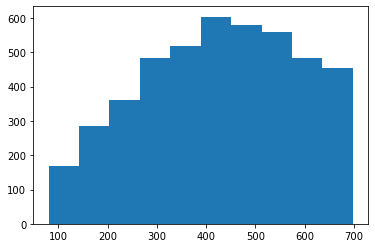

In [170]:
plt.hist(sent_len2)
plt.show()

In [171]:
query_lst = []
for k, file in enumerate(TRAIN_FILES):
    with open(TRAIN_DIR + file, 'r', encoding='utf-8') as f:
        js_dt = json.load(f)
        query = js_dt['query'].replace('\n', '').replace('x', '')
        q_id = js_dt['q_id']
        query_lst.append([q_id, query])
df_train_q = pd.DataFrame(query_lst, columns=['q_id', 'query'])
df_train_q

,q_id,query
0,0,原告彭正坤诉称，2018年1月29日，原告彭正坤与三名被告及本案第三人签订了《股权转让协议书...
1,1,白淑坤向本院提出诉讼请求：1．判令魏金保赔偿各项损失21298.32元；2．诉讼费由魏金保负...
2,10,原告安徽明远电力设备制造有限公司诉称：原被告于2014年9月1日签订了《定作合同》，合同签订...
3,100,原告向本院提出诉讼请求：1、确认原、被告之间签订的离婚协议书有效，被告配合原告办理房屋过户登...
4,1000,原告陈妍向法院提出诉讼请求：1.请求法院判令被告支付欠款1148元；2.本案诉讼费由被告承担...
...,...,...
8495,995,原告垫富宝投资有限公司向本院提出诉讼请求：1.请求判决被告偿还原告垫付款本金81825.31...
8496,996,本院经审理认定：被告盛学水曾向原告吴云飞借款。2002年5月28日，被告向原告出具借条一张，...
8497,997,李某向本院提出诉讼请求：1、依法确认高某于2018年10月签订的《拆迁安置补偿协议》所涉拆迁...
8498,998,原告诉称：2013年至2014年度，原告时任被告村委会委员，为维持被告日常必要的生产生活需要...


In [173]:
query_lst = []
for k, file in enumerate(TEST_FILES):
    with open(TEST_DIR + file, 'r', encoding='utf-8') as f:
        js_dt = json.load(f)
        query = js_dt['query'].replace('\n', '').replace('x', '')
        q_id = js_dt['q_id']
        query_lst.append([q_id, query])
df_test_q = pd.DataFrame(query_lst, columns=['q_id', 'query'])
df_test_q

,q_id,query
0,10000,原告苏某甲诉称，原告苏某甲与被告法定代理人段某某系被告苏某乙的父母，二人因离婚纠纷由包头市昆...
1,10001,本院经审理认定：原告李干平与被告沈从和之间存在胶水买卖合同关系。2015年12月20日，被告...
2,10002,原告东营人和物流有限公司向本院提出以下诉讼请求：一、判令被告赔偿原告车辆损失费、施救费、鉴定...
3,10003,闾某诉称：2013年10月1日，其与庄某甲经他人介绍，随后建立恋爱关系。此后，应女方要求，其...
4,10004,原告任小俊诉称，2014年12月17日，原、被告签订商品房预售合同，原告按约支付了购房款，但...
...,...,...
2176,9995,原告诉称，2011年12月份，因原告要买车被第二被告吴士友知道，吴士友打电话告诉原告说他有个...
2177,9996,原告弘重公司向本院提出诉讼请求：1.判令被告黄斌、孙成林向原告支付挖掘机租金垫付款72038...
2178,9997,原告诉称，2017年8月20日，原告骑电动车行驶至庙仙乡邮政所北20米处时，被横跨道路断掉坠...
2179,9998,许金田向本院提出诉讼请求：1、依法判令被告赔偿原告车损、施救费、公估费等损失共计86760元...


In [176]:
df_train_test = pd.concat([df_train_q, df_test_q], axis=0).sort_values(by=['q_id']).reset_index(drop=True)
df_train_test

,q_id,query
0,0,原告彭正坤诉称，2018年1月29日，原告彭正坤与三名被告及本案第三人签订了《股权转让协议书...
1,1,白淑坤向本院提出诉讼请求：1．判令魏金保赔偿各项损失21298.32元；2．诉讼费由魏金保负...
2,2,原告吴学志向本院提出诉讼请求：1.被告退还原告欠款55000元；2.本案诉讼费用由被告承担。...
3,3,原告诉称，2009年10月10日，原告经青岛市市南区民政局办理了收养邱程程（曾用名邱程仪，身...
4,4,原告高兵向本院提出如下诉讼请求：1、判令被告撤离占用的原、被告之间的公用面积；2、本案诉讼费...
...,...,...
10676,10676,原告邱前诉称，自2008年7月18日起，原告陆续给被告送小麦，由被告给原告加工面粉，截止20...
10677,10677,腾飞公司向本院提出诉讼请求：1.依法判令被告给付原告工程款暂计943351.81元，并支付利...
10678,10678,原告赵某某诉称：原告赵某某系被告陈某甲的母亲，原告因年迈、体弱多病，不能照顾自己，且无其他生...
10679,10679,原告上海龙沿控股集团有限公司向本院提出诉讼请求：判令被告归还借款人民币（币种下同）300万元...


In [178]:
df_train_test.to_csv('./result/train_test_pred.csv', index=None, encoding='utf_8_sig')